In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd

#df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2 = pd.read_csv(r'E:\Tesis\Data\raw4.csv', encoding='latin-1')
df2


,N°,Date,Name,Type,Cause,Material,Collapse,Status,Country,Region,Sub-region,SSP1-1.9,SSP1-1.9.1,SSP2-4.5,SSP3-7.0,SSP5-8.5
0,1,1945,Ludendorff,Truss,Terrorism,Steel,Total,Operational,Germany,Europe,West& Central-Europe,-0.27856,-0.02144,-0.02468,0.08276,-0.02468
1,2,2012,Rio Beaver,Trestle,Terrorism,Composite,Total,Operational,Canada,North America,N.W.North America,1.58241,1.72676,1.92925,1.75697,1.971835
2,3,2024,Red,Beam,Terrorism,Reinforced concrete,Total,Operational,Canada,North America,N.W.North America,2.58803,2.722245,3.03332,2.2742,2.57836
3,4,1997,La Granja,Not defined,Terrorism,Reinforced concrete,Total,Operational,Colombia,Central America,N.W.South America,0.50321,0.59091,0.5656,0.534405,0.50321
4,5,1997,La Conguta,Not defined,Terrorism,Not defined,Partial,Operational,Colombia,Central America,N.W.South America,0.50321,0.59091,0.5656,0.534405,0.50321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1534,2024,Chunis,Not defined,Deterioration,Not defined,Partial,Operational,Ecuador,Central /SouthAmerica,N.W.South America,"138,064","158,366","158,366","1,203,385","150,025"
1534,1535,2024,Llano Chico,Beam,Deterioration,Steel,Partial,Operational,Ecuador,Central /SouthAmerica,N.W.South America,"138,064","158,366","158,366","1,203,385","150,025"
1535,1536,2024,Rio Onzole,Not defined,Deterioration,Not defined,Partial,Operational,Ecuador,Central /SouthAmerica,N.W.South America,"138,064","158,366","158,366","1,203,385","150,025"
1536,1537,2025,Rio Magro,Suspension,Overloading,Steel,Total,Operational,Ecuador,Central /SouthAmerica,N.W.South America,"155,121","132,869","132,869","1,400,375","148,139"


In [3]:
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

In [5]:
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


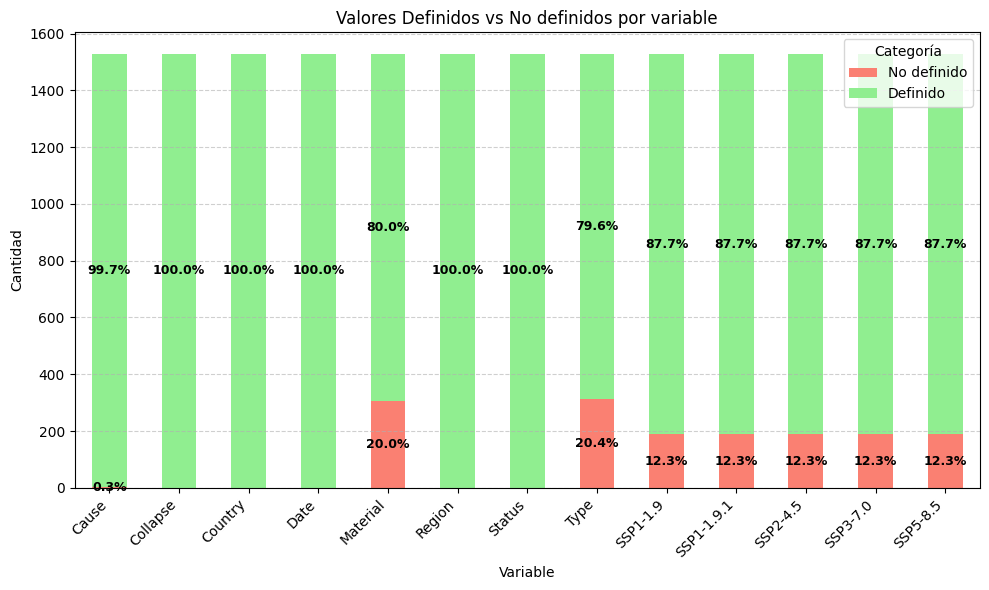

In [7]:
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


In [8]:
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




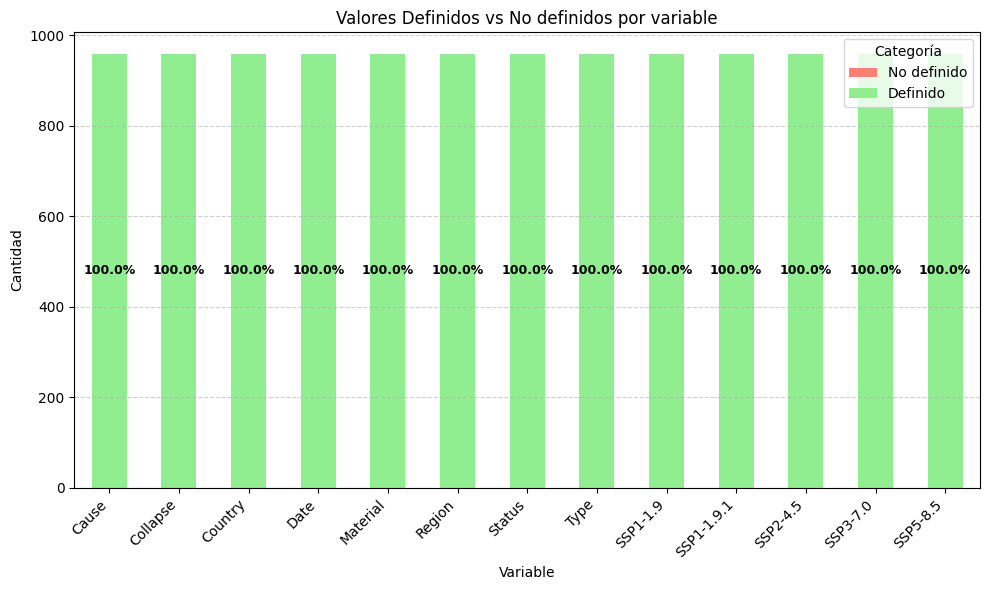

In [9]:
stacked_not_defined_comparison(X, features)

In [10]:
len(X)

959

In [11]:
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# Frecuencias


In [12]:
df=X

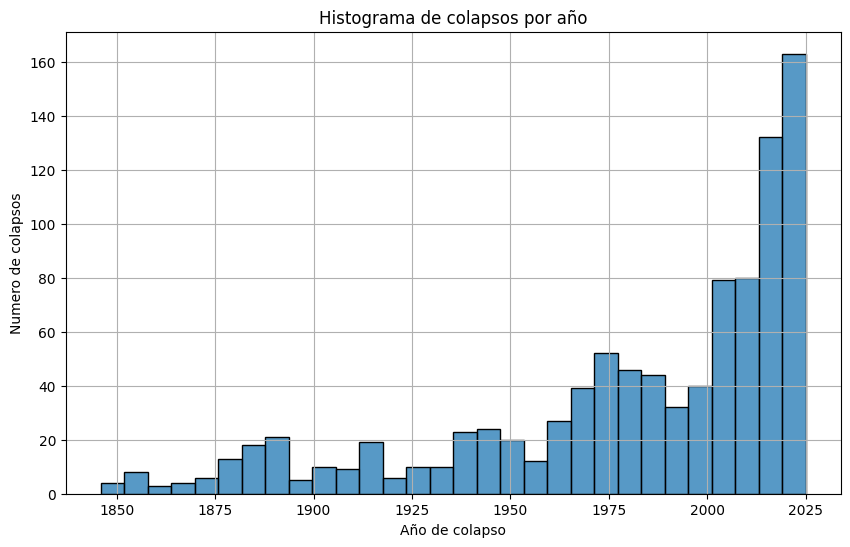

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


In [14]:
import matplotlib.pyplot as plt

def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values.values, color='steelblue')
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
            height,                             # y position (top of bar)
            str(height),                        # text
            ha='center', va='bottom', fontsize=9
        )
    
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


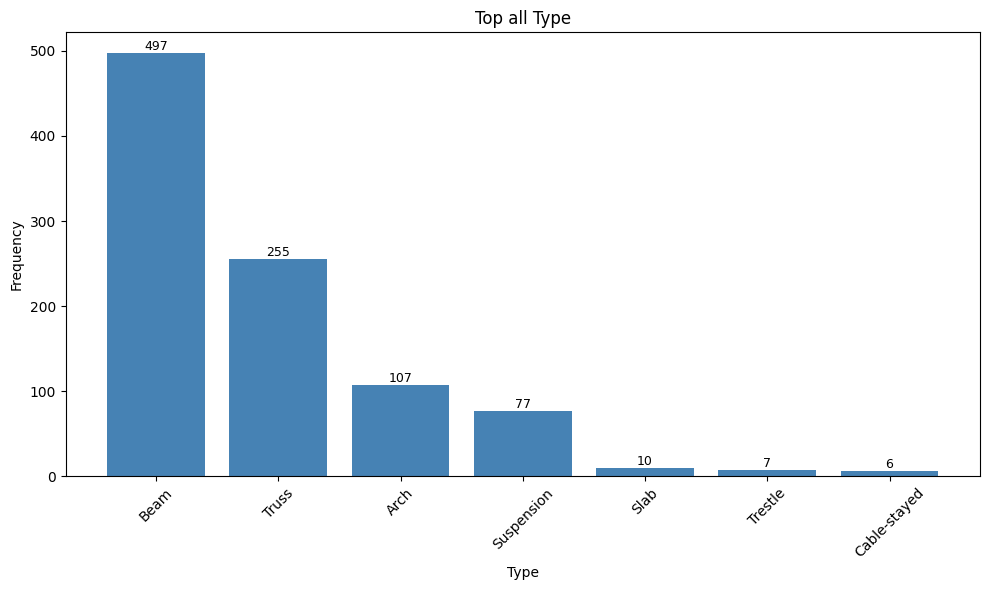

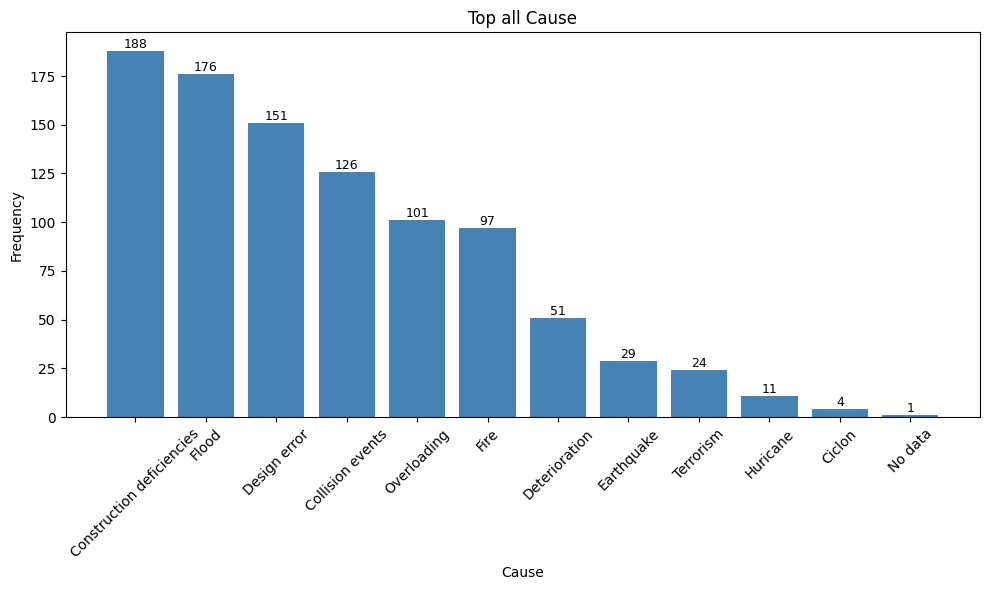

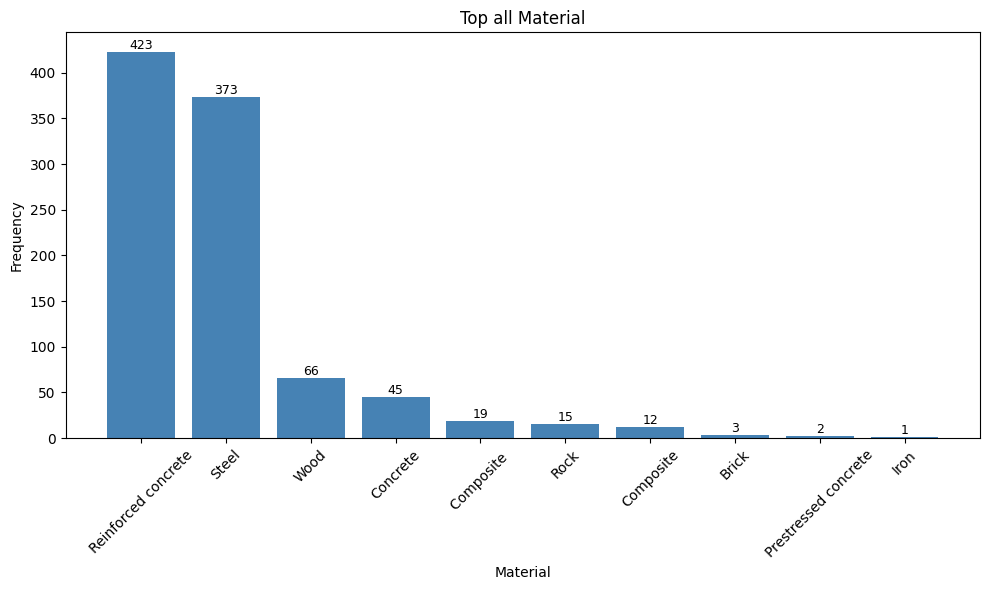

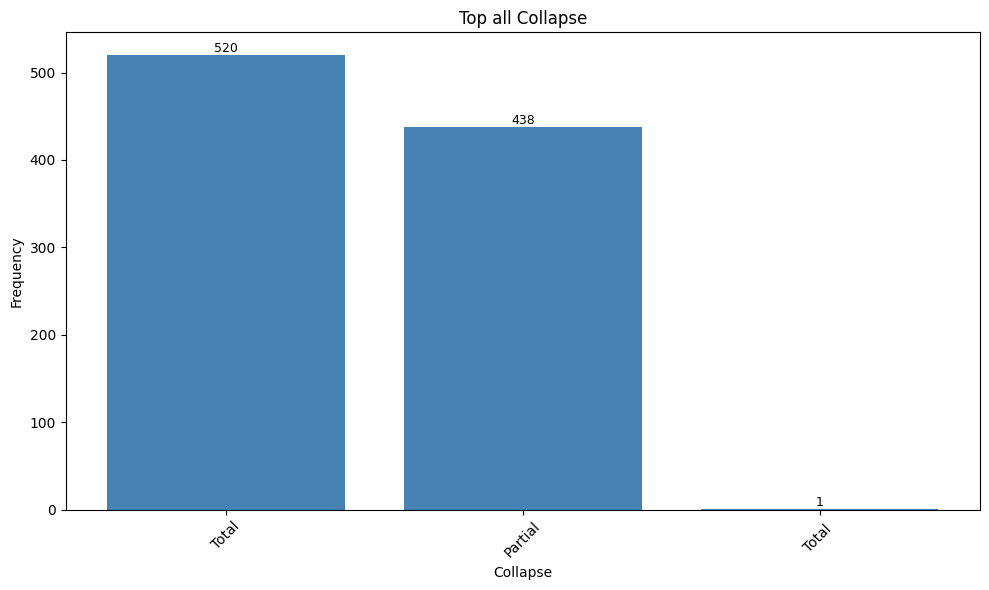

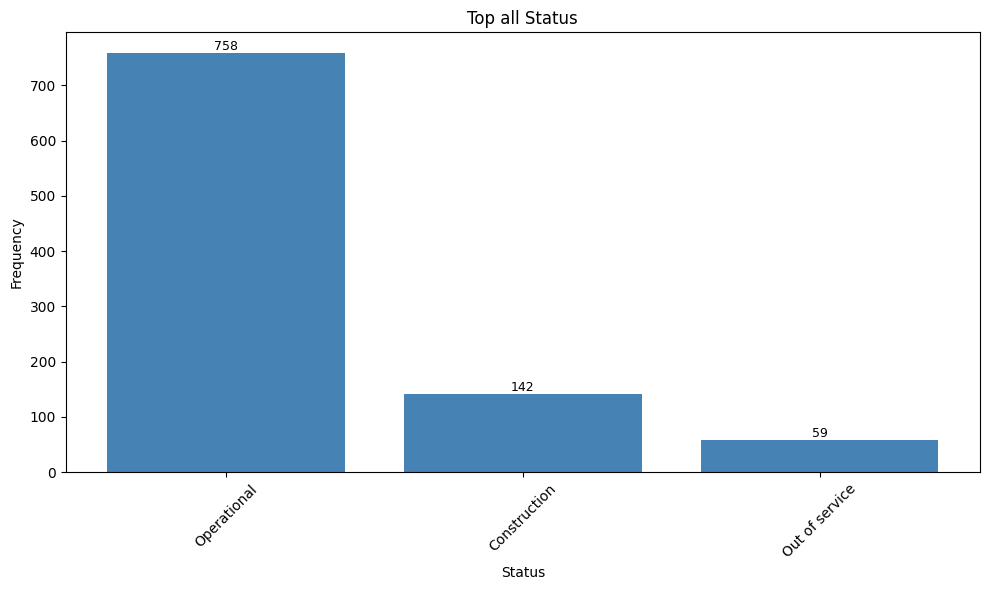

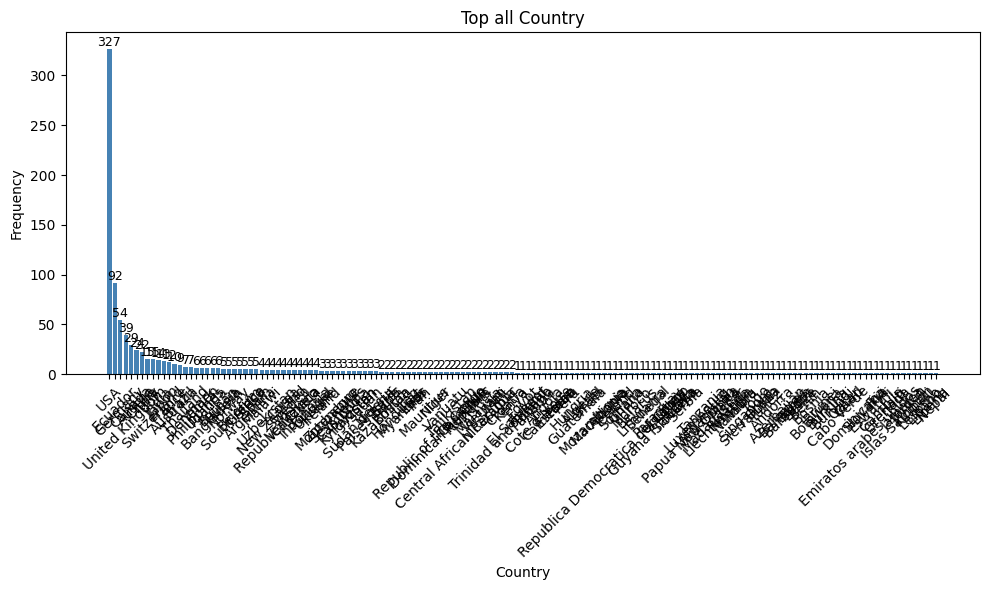

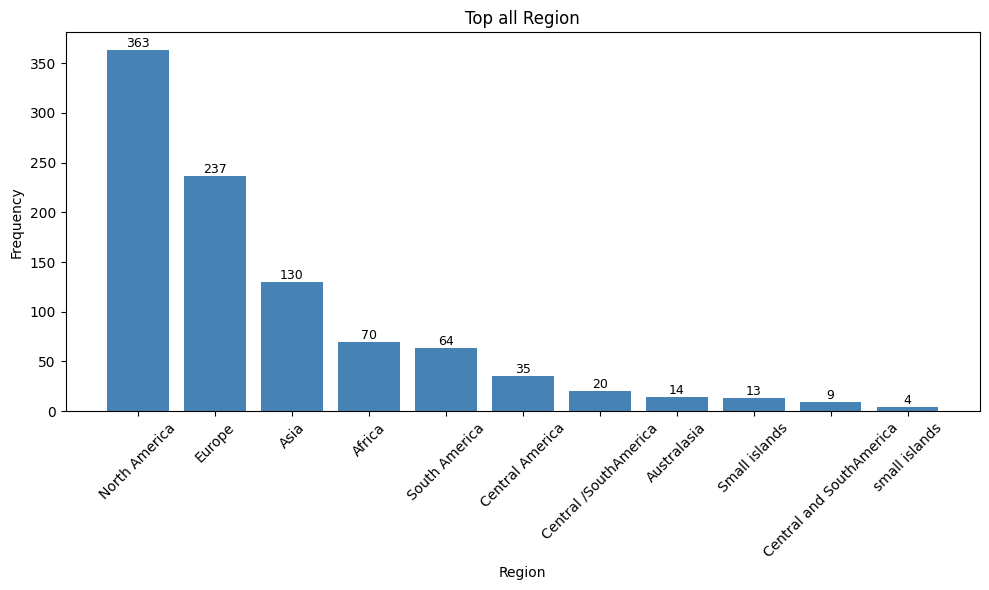

In [15]:
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


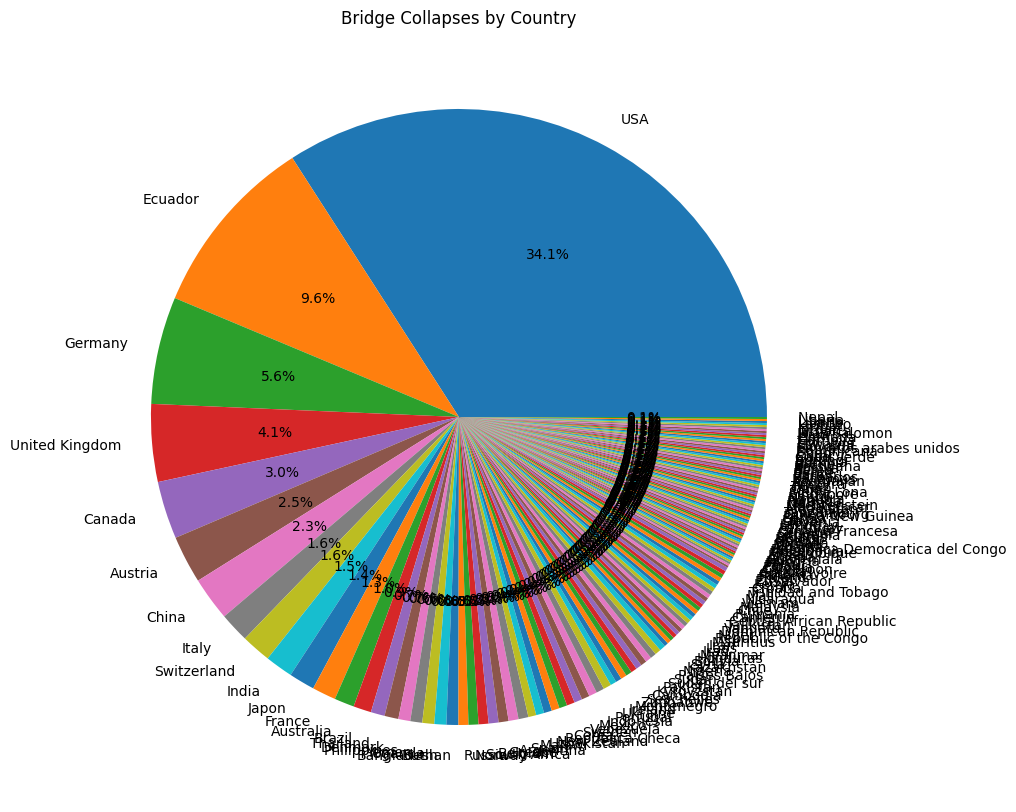

In [16]:

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# Eliminacion de Outliers

In [17]:


## Eliminacion de Causes que tienen pocos valores

X = X[~X['Cause'].isin(["Ciclon", "Hurricane", "Terrorism", "Deterioration",'Earthquake'])]



Y=X['Cause'].copy()

cat_cols.remove("Country")
cat_cols.remove("Region")
cat_cols.remove("Status")
X=X.drop(columns=['Country','Region','Status','Date'])

temp_df=X


In [18]:
print("Count de X "+str(X.count()))

Count de X Type                 851
Cause                851
Material             851
Collapse             851
temperature_1.9      851
temperature_1.9.1    851
temperature_4.5      851
temperature_7.0      835
temperature_8.5      851
dtype: int64


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 41 to 1537
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               851 non-null    object 
 1   Cause              851 non-null    object 
 2   Material           851 non-null    object 
 3   Collapse           851 non-null    object 
 4   temperature_1.9    851 non-null    float64
 5   temperature_1.9.1  851 non-null    float64
 6   temperature_4.5    851 non-null    float64
 7   temperature_7.0    835 non-null    float64
 8   temperature_8.5    851 non-null    float64
dtypes: float64(5), object(4)
memory usage: 66.5+ KB


In [20]:
temp_df

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1526,Cable-stayed,Overloading,Steel,Total,12.47700,104.087000,129.80100,NaN,110.78900
1528,Cable-stayed,Flood,Steel,Total,165.74500,140.344000,112.02800,NaN,133.28200
1530,Beam,Flood,Concrete,Total,138.06400,158.366000,158.36600,NaN,150.02500
1536,Suspension,Overloading,Steel,Total,155.12100,132.869000,132.86900,NaN,148.13900


In [21]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 41 to 1537
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               851 non-null    object 
 1   Cause              851 non-null    object 
 2   Material           851 non-null    object 
 3   Collapse           851 non-null    object 
 4   temperature_1.9    851 non-null    float64
 5   temperature_1.9.1  851 non-null    float64
 6   temperature_4.5    851 non-null    float64
 7   temperature_7.0    835 non-null    float64
 8   temperature_8.5    851 non-null    float64
dtypes: float64(5), object(4)
memory usage: 66.5+ KB


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_floats(df):
    float_cols = df.select_dtypes(include='float').columns

    for col in float_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Cause', y=col)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot of {col} grouped by Cause')
        plt.tight_layout()
        plt.show()


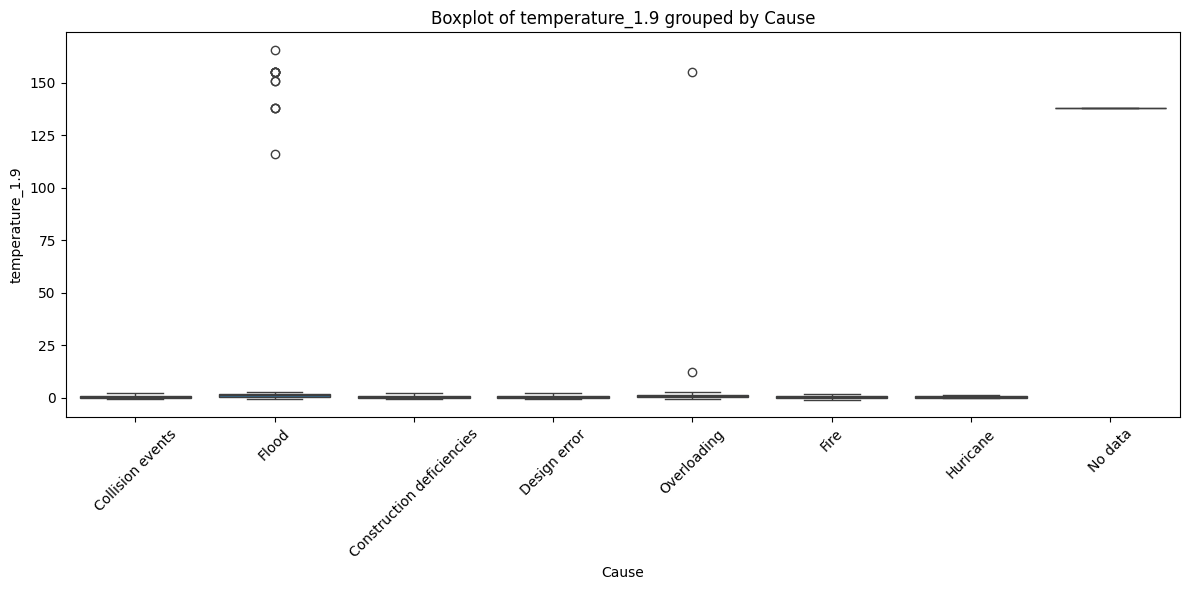

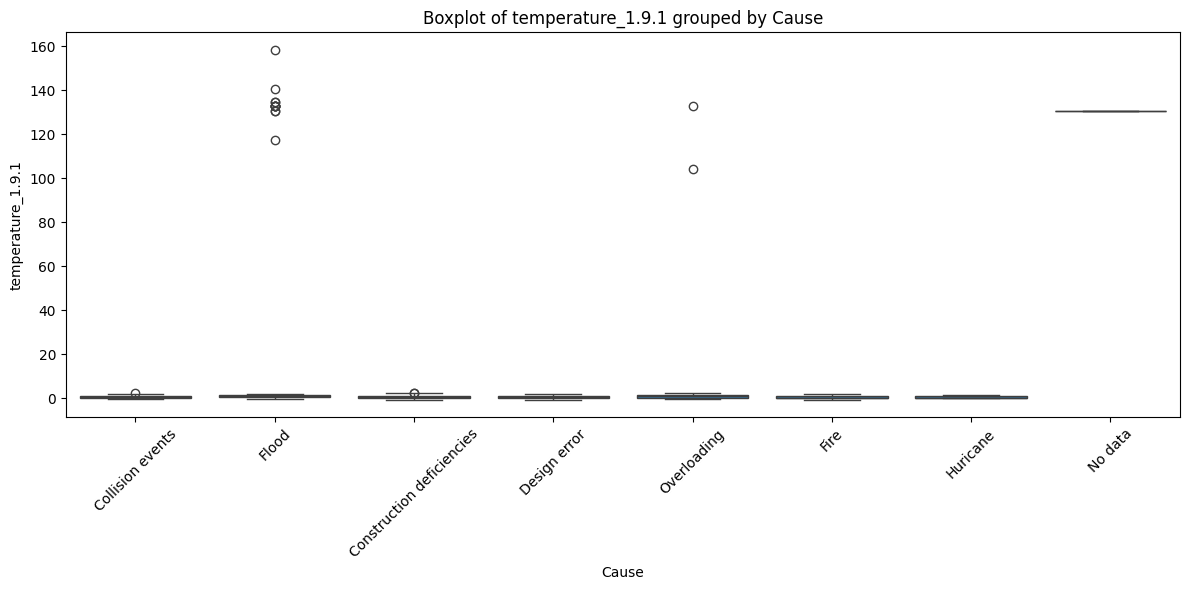

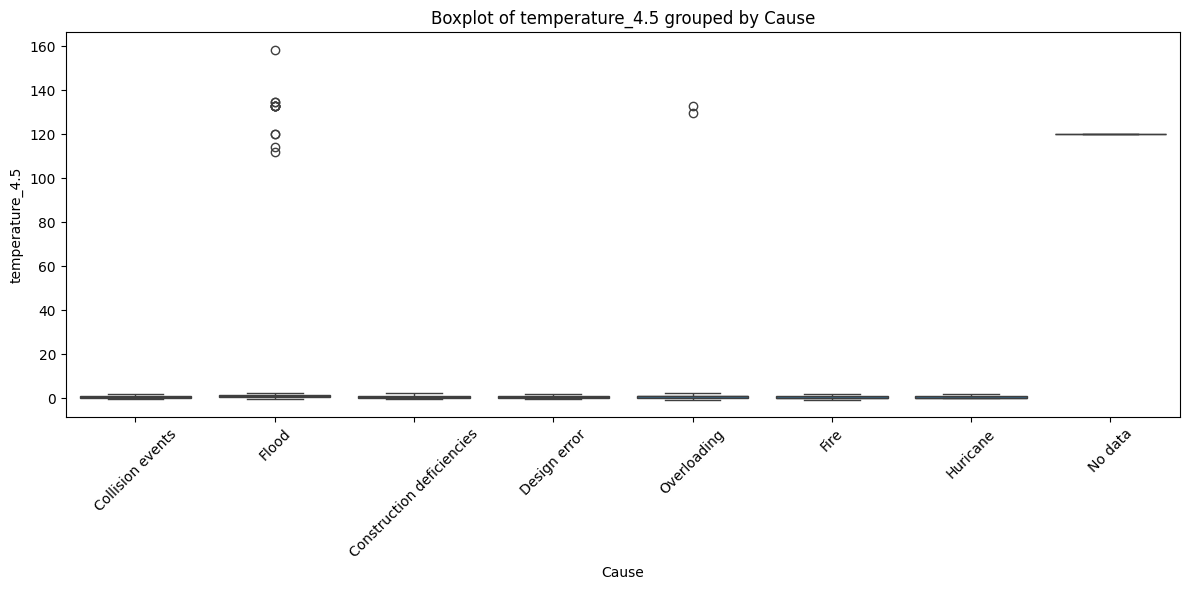

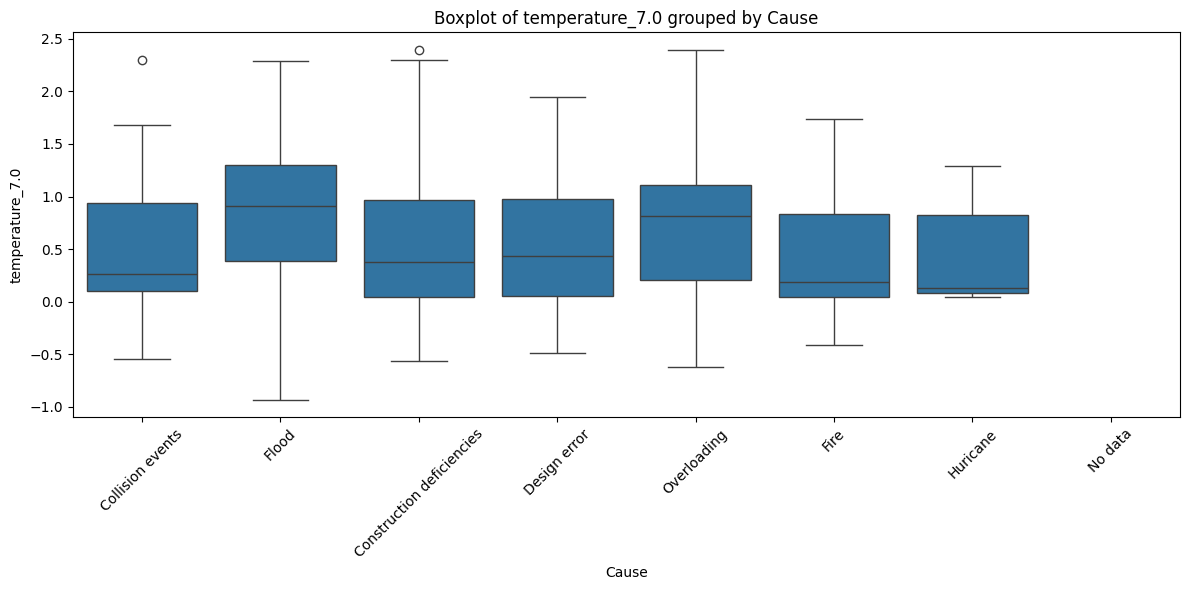

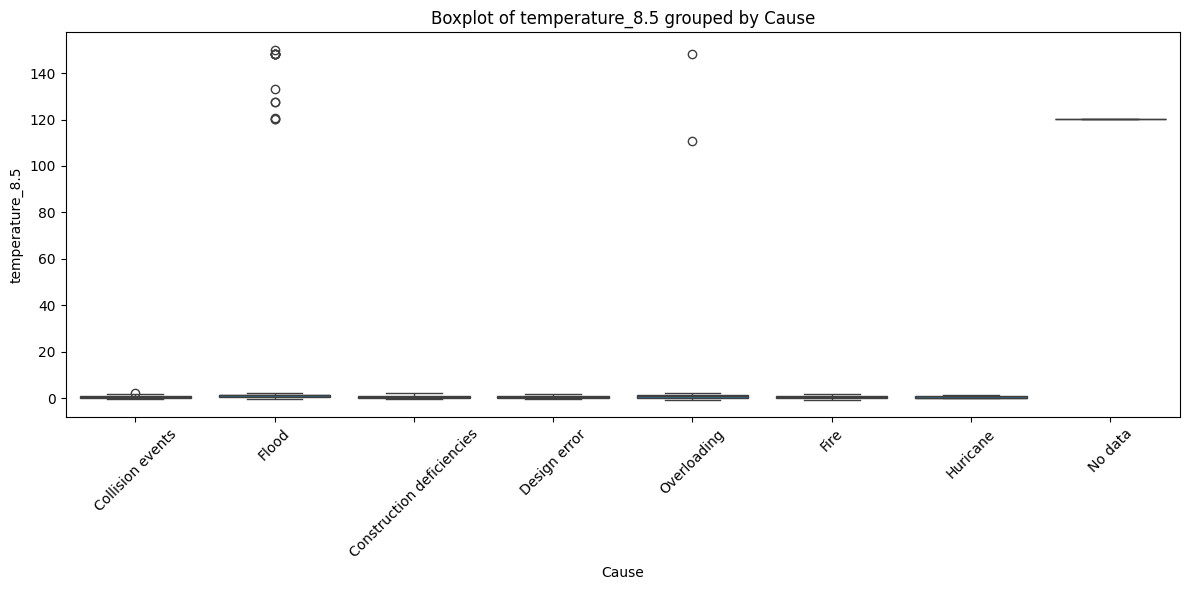

In [23]:
plot_boxplots_for_floats(temp_df)


In [24]:
def get_outlier_indices(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get indices of outliers in this column
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers_col)
    return outlier_indices

def remove_outliers(df):
    float_cols = df.select_dtypes(include='float').columns
    outlier_indices = get_outlier_indices(df, float_cols)
    print(f"Removing {len(outlier_indices)} rows identified as outliers.")
    return df.drop(index=outlier_indices)

temp_df = remove_outliers(temp_df)


Removing 16 rows identified as outliers.


In [25]:
temp_df

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562


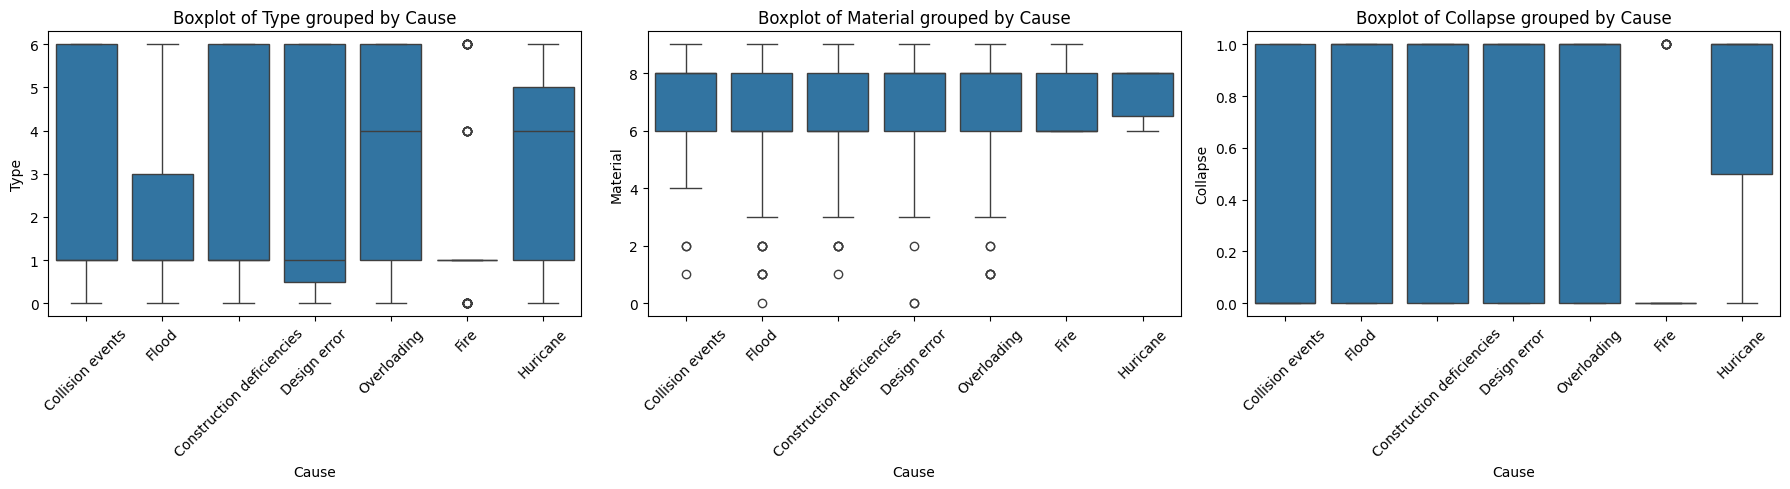

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Copia y codifica las variables categóricas
df_encoded = temp_df.copy()
categorical_cols = ['Type', 'Material', 'Collapse']
encoder = OrdinalEncoder()
df_encoded[categorical_cols] = encoder.fit_transform(temp_df[categorical_cols])

# Agregamos 'Date' que ya es numérica
features = categorical_cols 

# Creamos subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df_encoded, x='Cause', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} grouped by Cause')
    axes[i].tick_params(axis='x', rotation=45)

# Si hay más subplots de los que usamos, los ocultamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [27]:
categorical_cols=cat_cols

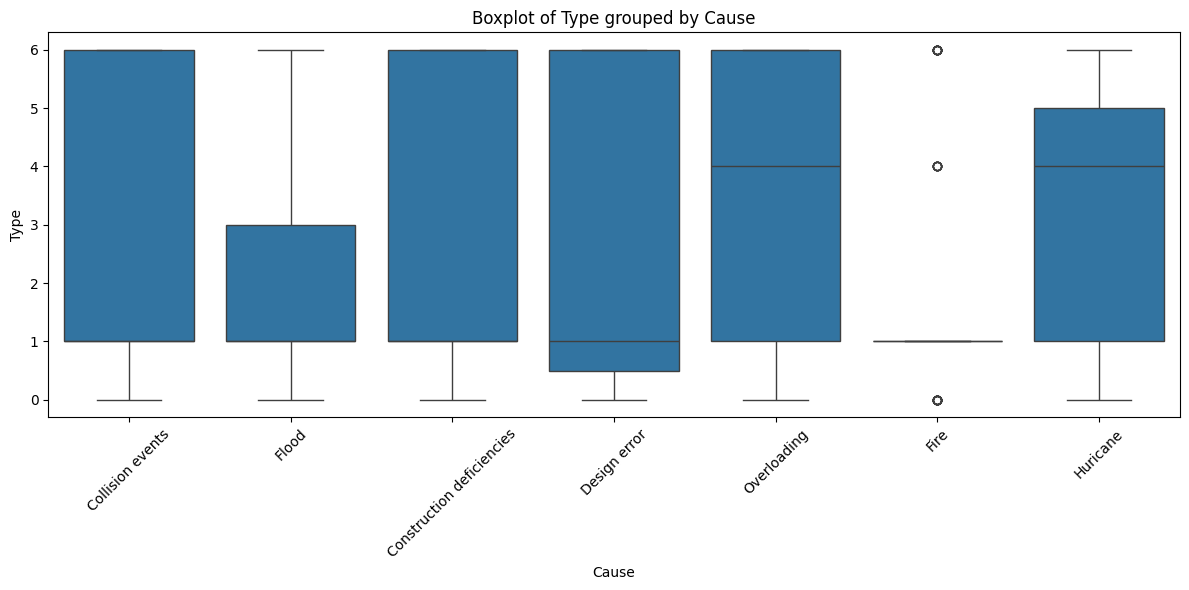

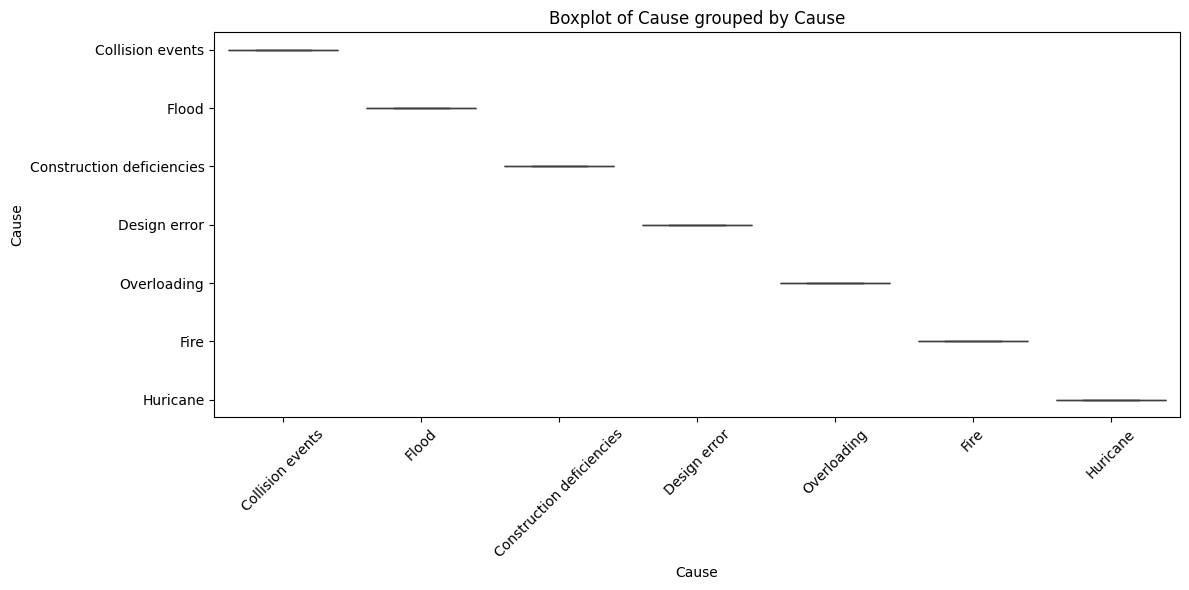

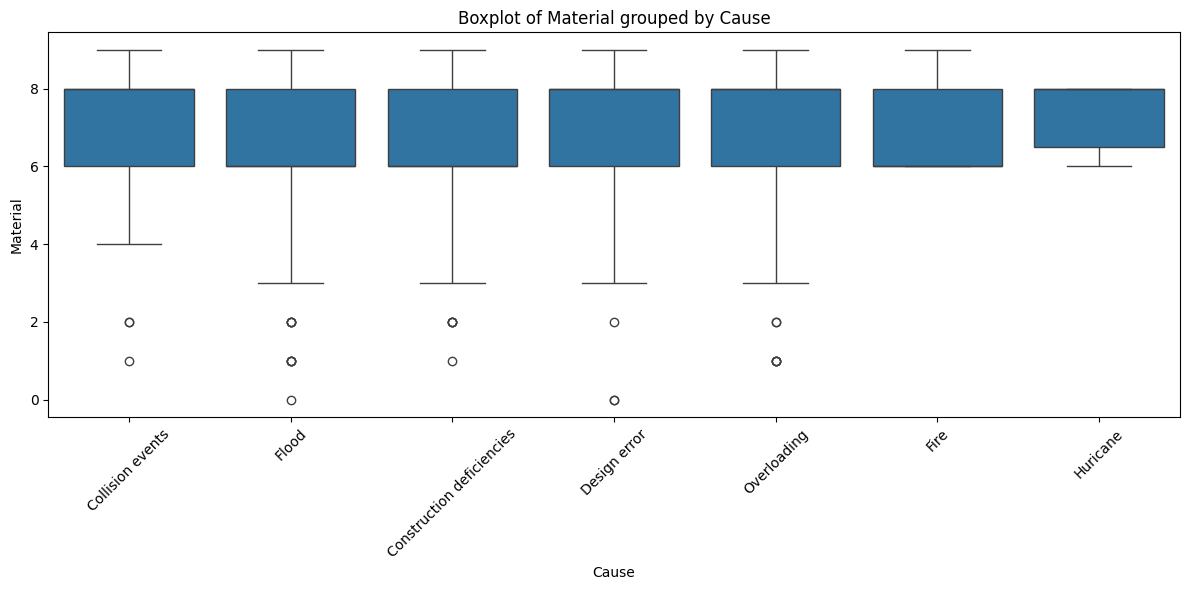

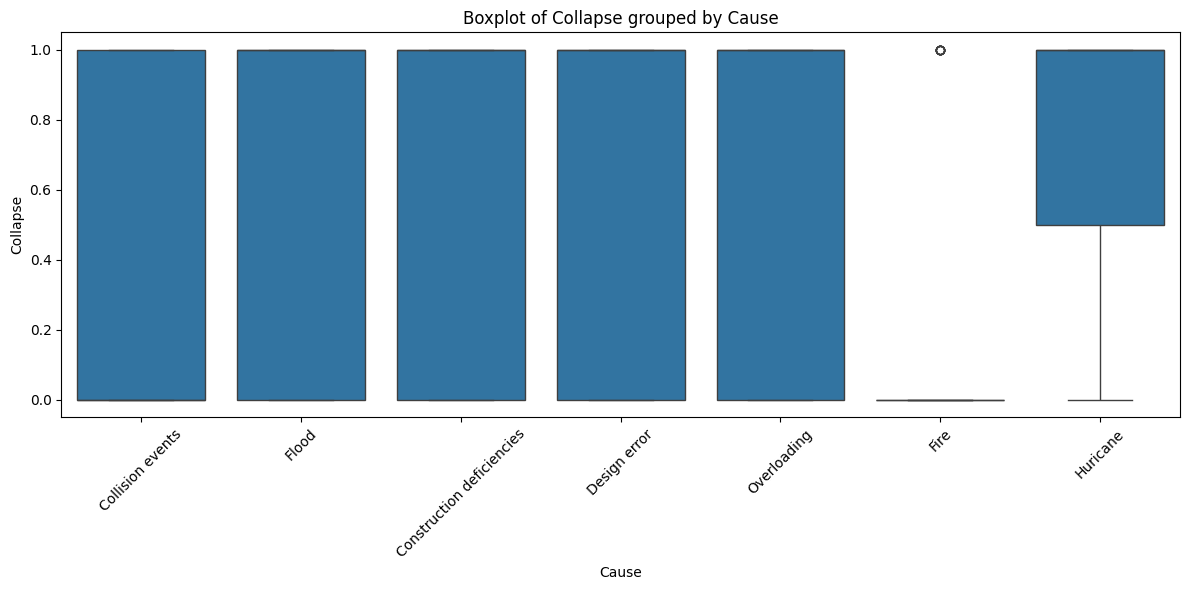

In [28]:
for col in categorical_cols :
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_encoded, x='Cause', y=col)
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} grouped by Cause')
    plt.tight_layout()
    plt.show()


In [29]:
import pandas as pd

# Copy the encoded dataframe
df_cleaned = df_encoded.copy()

# Define features to clean (assume they are supposed to be numeric after encoding)
features = categorical_cols 

# Loop through each feature
for col in features:
    # Skip non-numeric columns (just in case)
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        continue

    for cause in df_cleaned['Cause'].unique():
        mask = df_cleaned['Cause'] == cause
        group = df_cleaned.loc[mask, col]

        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ~group.between(lower_bound, upper_bound)
        df_cleaned = df_cleaned.drop(group[outliers].index)

df_cleaned.reset_index(drop=True, inplace=True)


In [30]:
print(f"Original size: {df_encoded.shape[0]} rows")
print(f"Cleaned size: {df_cleaned.shape[0]} rows")
print(f"Removed: {df_encoded.shape[0] - df_cleaned.shape[0]} outliers")


Original size: 835 rows
Cleaned size: 762 rows
Removed: 73 outliers


In [31]:
df_cleaned
Y=df_cleaned['Cause']
df_cleaned=df_cleaned.drop(columns=['Cause'])

In [32]:
cat_cols.remove('Cause')

In [33]:
df_cleaned

,Type,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,1.0,6.0,1.0,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
1,6.0,8.0,1.0,0.96894,1.784090,1.65721,1.445855,1.41198
2,6.0,8.0,0.0,0.40503,0.348125,0.21938,0.244370,0.21938
3,4.0,9.0,0.0,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
4,1.0,6.0,1.0,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
757,6.0,8.0,1.0,2.19699,0.958785,0.91271,0.871430,1.02916
758,1.0,6.0,1.0,2.58803,1.154960,1.20863,1.043770,1.13041
759,1.0,6.0,1.0,1.06424,0.899050,1.01453,1.045700,1.01453
760,1.0,6.0,1.0,1.57352,1.523960,1.32506,1.351885,1.60314


In [34]:
cat_cols

['Type', 'Material', 'Collapse']

In [35]:
X_cleaned_encoded = df_cleaned[cat_cols].to_numpy()

X_cleaned_original = encoder.inverse_transform(X_cleaned_encoded)

df_cleaned[cat_cols] = X_cleaned_original


In [36]:
df_cleaned

,Type,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,Beam,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
1,Truss,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
2,Truss,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
3,Suspension,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
4,Beam,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
757,Truss,Steel,Total,2.19699,0.958785,0.91271,0.871430,1.02916
758,Beam,Reinforced concrete,Total,2.58803,1.154960,1.20863,1.043770,1.13041
759,Beam,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
760,Beam,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314


In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               762 non-null    object 
 1   Material           762 non-null    object 
 2   Collapse           762 non-null    object 
 3   temperature_1.9    762 non-null    float64
 4   temperature_1.9.1  762 non-null    float64
 5   temperature_4.5    762 non-null    float64
 6   temperature_7.0    762 non-null    float64
 7   temperature_8.5    762 non-null    float64
dtypes: float64(5), object(3)
memory usage: 47.8+ KB


In [38]:
X=df_cleaned
X

,Type,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,Beam,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
1,Truss,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
2,Truss,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
3,Suspension,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
4,Beam,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
757,Truss,Steel,Total,2.19699,0.958785,0.91271,0.871430,1.02916
758,Beam,Reinforced concrete,Total,2.58803,1.154960,1.20863,1.043770,1.13041
759,Beam,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
760,Beam,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314


In [39]:
num_cols.remove('Date')

In [40]:
cat_cols=['Type', "Collapse", 'Material']

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder



preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

In [42]:
from sklearn.pipeline import Pipeline


pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),

])

In [43]:
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.manifold import TSNE

def plot_tsne(pipeline, X, y, perplexity=30, n_iter=1000, random_state=42):
    
    preprocessor = pipeline.named_steps['preprocessing']
    X_preprocessed = preprocessor.fit_transform(X)

    if hasattr(X_preprocessed, "toarray"):
        X_preprocessed = X_preprocessed.toarray()
    
    if hasattr(y, 'values'):
        y = y.values

    if y.dtype == 'object' or y.dtype.name == 'category':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        classes = label_encoder.classes_
    else:
        y_encoded = y
        classes = np.unique(y)

    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=random_state)
    X_tsne = tsne.fit_transform(X_preprocessed)

    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(classes):
        plt.scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1],
                    label=class_name, alpha=0.6, s=50)

    plt.title('t-SNE projection (by Cause)')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [44]:
X

,Type,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,Beam,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
1,Truss,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
2,Truss,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
3,Suspension,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
4,Beam,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
757,Truss,Steel,Total,2.19699,0.958785,0.91271,0.871430,1.02916
758,Beam,Reinforced concrete,Total,2.58803,1.154960,1.20863,1.043770,1.13041
759,Beam,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
760,Beam,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314


C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
   

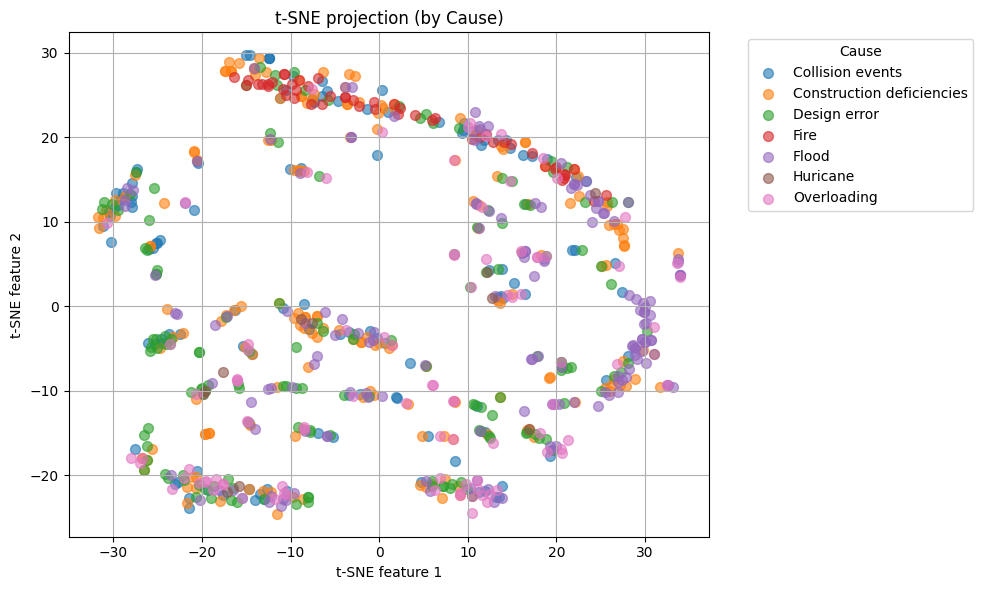

In [45]:
plot_tsne(pipeline,X,Y)

In [46]:
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_cols=['Type','Material','Collapse']

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols),
        ('scale', StandardScaler(with_mean=True), num_cols)
    ],
    sparse_threshold=0
)



In [48]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())

])

param_grid={

    'model__n_neighbors': [3,5,7] 
}

# KNeighbors

In [49]:

grid_search=GridSearchCV(

    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [50]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'Material',
                                                                          'Collapse']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['temperature_1.9',
                                                                          'temperature_1.9.1',
                                                                          'temperature_4.5',
                                                                          'temperature_7.0',
                                                                          'temperature_8.5'])])),
                                       ('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': [3, 5, 7]},
             scoring='f1_macro')

In [51]:
print("Best k:", grid_search.best_params_['model__n_neighbors'])
print("Best cross-validated F1 (macro):", grid_search.best_score_)


Best k: 7
Best cross-validated F1 (macro): 0.2484774564923907


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=grid_search.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2  5  3  2  0  1]
 [ 6 16  5  4  4  0  2]
 [ 8  4 10  4  2  0  2]
 [ 0  4  1  4  1  0  0]
 [ 6  5  5  1 12  0  2]
 [ 0  0  1  0  1  0  0]
 [ 4  4  4  0  3  0  3]]
                           precision    recall  f1-score   support

         Collision events       0.33      0.48      0.39        25
Construction deficiencies       0.46      0.43      0.44        37
             Design error       0.32      0.33      0.33        30
                     Fire       0.25      0.40      0.31        10
                    Flood       0.48      0.39      0.43        31
                 Huricane       0.00      0.00      0.00         2
              Overloading       0.30      0.17      0.21        18

                 accuracy                           0.37       153
                macro avg       0.31      0.31      0.30       153
             weighted avg       0.38      0.37      0.37       153



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

## RANDOMFOREST

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())

])

param_grid={

    'model__n_neighbors': [3,5,7] 
}

In [54]:

grid_search=GridSearchCV(

    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [55]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'Material',
                                                                          'Collapse']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['temperature_1.9',
                                                                          'temperature_1.9.1',
                                                                          'temperature_4.5',
                                                                          'temperature_7.0',
                                                                          'temperature_8.5'])])),
                                       ('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': [3, 5, 7]},
             scoring='f1_macro')

In [56]:

y_pred=grid_search.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2  5  3  2  0  1]
 [ 6 16  5  4  4  0  2]
 [ 8  4 10  4  2  0  2]
 [ 0  4  1  4  1  0  0]
 [ 6  5  5  1 12  0  2]
 [ 0  0  1  0  1  0  0]
 [ 4  4  4  0  3  0  3]]
                           precision    recall  f1-score   support

         Collision events       0.33      0.48      0.39        25
Construction deficiencies       0.46      0.43      0.44        37
             Design error       0.32      0.33      0.33        30
                     Fire       0.25      0.40      0.31        10
                    Flood       0.48      0.39      0.43        31
                 Huricane       0.00      0.00      0.00         2
              Overloading       0.30      0.17      0.21        18

                 accuracy                           0.37       153
                macro avg       0.31      0.31      0.30       153
             weighted avg       0.38      0.37      0.37       153



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

# MLP

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(),num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type', 'Material', 'Collapse'])
])

In [59]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    max_iter=1000,
    random_state=42
)

In [60]:
mlp_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', mlp)
])

In [61]:
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature_1.9',
                                                   'temperature_1.9.1',
                                                   'temperature_4.5',
                                                   'temperature_7.0',
                                                   'temperature_8.5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Material',
                                                   'Collapse'])])),
                ('model',
                 MLPClassifier(alpha=0.0005, hidden_layer_sizes=(128, 64),
                               max_iter=1000, random_state=42))])

In [62]:
y_pred = mlp_pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 5  4  7  6  2  0  1]
 [ 4 10 10  4  7  0  2]
 [ 2  5 15  4  3  0  1]
 [ 0  0  0  8  2  0  0]
 [ 0  4  4  2 15  0  6]
 [ 0  0  1  0  1  0  0]
 [ 0  4  7  0  5  0  2]]
                           precision    recall  f1-score   support

         Collision events       0.45      0.20      0.28        25
Construction deficiencies       0.37      0.27      0.31        37
             Design error       0.34      0.50      0.41        30
                     Fire       0.33      0.80      0.47        10
                    Flood       0.43      0.48      0.45        31
                 Huricane       0.00      0.00      0.00         2
              Overloading       0.17      0.11      0.13        18

                 accuracy                           0.36       153
                macro avg       0.30      0.34      0.29       153
             weighted avg       0.36      0.36      0.34       153



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

# Divided Datset

In [63]:
df_otl=temp_df.copy()
df_otl

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562


In [64]:
cat_cols

['Type', 'Material', 'Collapse']

In [65]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()

temp_df[cat_cols]=encoder.fit_transform(temp_df[cat_cols])

mapping = {
    col: dict(zip(encoder.categories_[i], range(len(encoder.categories_[i]))))
    for i, col in enumerate(cat_cols)
}

print(mapping)

{'Type': {'Arch': 0, 'Beam': 1, 'Cable-stayed': 2, 'Slab': 3, 'Suspension': 4, 'Trestle': 5, 'Truss': 6}, 'Material': {'Brick': 0, 'Composite': 1, 'Composite ': 2, 'Concrete': 3, 'Iron': 4, 'Prestressed concrete': 5, 'Reinforced concrete': 6, 'Rock': 7, 'Steel': 8, 'Wood': 9}, 'Collapse': {'Partial': 0, 'Total': 1}}


In [66]:
df_otl

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562


In [67]:

temp_df

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,1.0,Collision events,6.0,1.0,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,6.0,Collision events,8.0,1.0,0.96894,1.784090,1.65721,1.445855,1.41198
45,6.0,Collision events,8.0,0.0,0.40503,0.348125,0.21938,0.244370,0.21938
46,4.0,Collision events,9.0,0.0,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,1.0,Collision events,6.0,1.0,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,1.0,Construction deficiencies,6.0,1.0,1.06424,0.899050,1.01453,1.045700,1.01453
1503,1.0,Flood,1.0,0.0,1.67965,1.289420,1.18791,1.369190,1.30962
1505,1.0,Flood,6.0,1.0,1.57352,1.523960,1.32506,1.351885,1.60314
1506,1.0,Construction deficiencies,1.0,1.0,1.42284,1.466040,1.65549,1.288590,1.42562


In [68]:
categorical_cols.append('Cause')
categorical_cols

['Type', 'Material', 'Collapse', 'Cause']

#### PRIMER Split

In [69]:
cat_df=temp_df[categorical_cols]
cat_df

,Type,Material,Collapse,Cause
41,1.0,6.0,1.0,Collision events
43,6.0,8.0,1.0,Collision events
45,6.0,8.0,0.0,Collision events
46,4.0,9.0,0.0,Collision events
48,1.0,6.0,1.0,Collision events
...,...,...,...,...
1501,1.0,6.0,1.0,Construction deficiencies
1503,1.0,1.0,0.0,Flood
1505,1.0,6.0,1.0,Flood
1506,1.0,1.0,1.0,Construction deficiencies


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing',
        ColumnTransformer(transformers=[
            # Only categorical columns
            ('cat', OrdinalEncoder(), [
                'Type',
                'Material',
                'Collapse'
            ])
        ])
    ),

])


In [71]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# -------------------
# 1. Split data
# -------------------
X = cat_df.drop(columns=["Cause"])   # replace with your target column name
y = cat_df["Cause"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


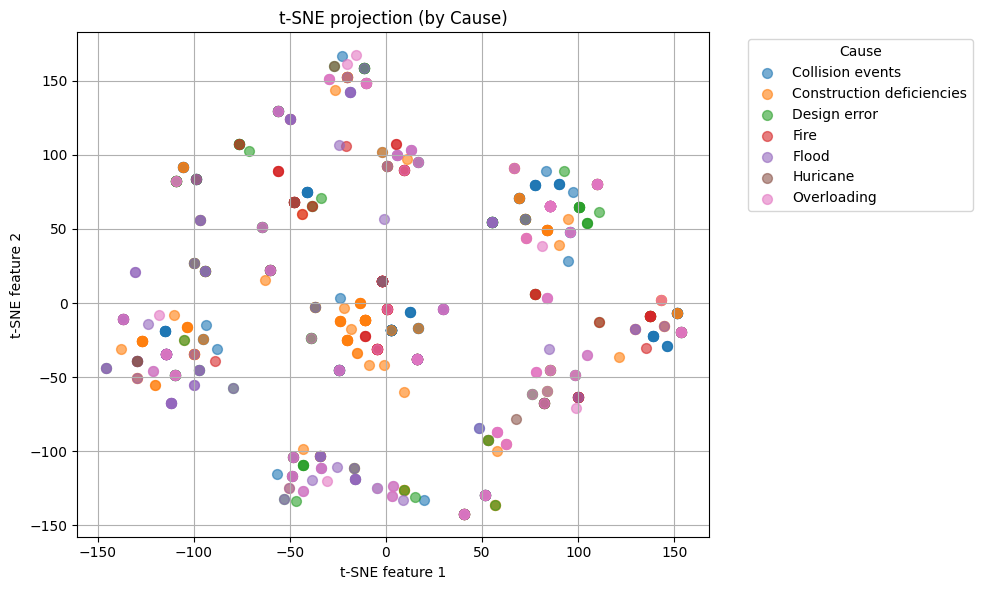

In [72]:
plot_tsne(pipeline,X,y)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

def plot_tsne(pipeline, X, y, perplexity=30, n_iter=1000, random_state=42):
    
    preprocessor = pipeline.named_steps['preprocessing']
    X_preprocessed = preprocessor.fit_transform(X)

    if hasattr(X_preprocessed, "toarray"):
        X_preprocessed = X_preprocessed.toarray()
    
    if hasattr(y, 'values'):
        y = y.values

    if y.dtype == 'object' or y.dtype.name == 'category':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        classes = label_encoder.classes_
    else:
        y_encoded = y
        classes = np.unique(y)

    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        n_iter=n_iter,
        random_state=random_state
    )
    X_tsne = tsne.fit_transform(X_preprocessed)

    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(classes):
        plt.scatter(
            X_tsne[y_encoded == i, 0],
            X_tsne[y_encoded == i, 1],
            label=class_name,
            alpha=0.6,
            s=50
        )

    plt.title('t-SNE projection (by Cause)')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [74]:
print("Columns in X:", X.columns.tolist())

Columns in X: ['Type', 'Material', 'Collapse']


In [75]:

# -------------------
# 2. Random Forest (no scaling)
# -------------------
rf = RandomForestClassifier(criterion="gini", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
[[ 6 11  6  2  4  0  9]
 [ 7 13 11  1 15  0 10]
 [ 3 13 13  1  2  0 13]
 [ 4 19  0  2  4  0  0]
 [ 2 12 13  0 16  0  6]
 [ 0  0  1  0  1  0  1]
 [ 2  7  3  1  7  0 10]]
                           precision    recall  f1-score   support

         Collision events       0.25      0.16      0.19        38
Construction deficiencies       0.17      0.23      0.20        57
             Design error       0.28      0.29      0.28        45
                     Fire       0.29      0.07      0.11        29
                    Flood       0.33      0.33      0.33        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.20      0.33      0.25        30

                 accuracy                           0.24       251
                macro avg       0.22      0.20      0.19       251
             weighted avg       0.25      0.24      0.23       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [76]:

# -------------------
# 3. MLP (with scaling)
# -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\n=== MLP ===")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))



=== MLP ===
[[ 5 12  6  3  3  0  9]
 [ 4 16  8  4 14  0 11]
 [ 2 10  9  4  5  0 15]
 [ 4 19  0  6  0  0  0]
 [ 0 12  9  5 18  0  5]
 [ 0  0  1  0  1  0  1]
 [ 2  6  2  4  6  0 10]]
                           precision    recall  f1-score   support

         Collision events       0.29      0.13      0.18        38
Construction deficiencies       0.21      0.28      0.24        57
             Design error       0.26      0.20      0.23        45
                     Fire       0.23      0.21      0.22        29
                    Flood       0.38      0.37      0.38        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.20      0.33      0.25        30

                 accuracy                           0.25       251
                macro avg       0.22      0.22      0.21       251
             weighted avg       0.26      0.25      0.25       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [77]:

# -------------------
# 4. Naive Bayes (Gaussian, scaling helps)
# -------------------
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("\n=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



=== Naive Bayes ===
[[ 5  2  5 11  3  0 12]
 [ 4  4  7 14 16  0 12]
 [ 2  2  9  9  7  0 16]
 [ 4  0  0 25  0  0  0]
 [ 0  2  9 11 21  0  6]
 [ 0  0  1  0  1  0  1]
 [ 3  4  2  4  7  0 10]]
                           precision    recall  f1-score   support

         Collision events       0.28      0.13      0.18        38
Construction deficiencies       0.29      0.07      0.11        57
             Design error       0.27      0.20      0.23        45
                     Fire       0.34      0.86      0.49        29
                    Flood       0.38      0.43      0.40        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.18      0.33      0.23        30

                 accuracy                           0.29       251
                macro avg       0.25      0.29      0.23       251
             weighted avg       0.29      0.29      0.26       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

### SEGundo Split

In [78]:
categorical_cols.remove('Cause')

In [79]:
num_df = temp_df.drop(columns=categorical_cols)
num_df

,Cause,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Collision events,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Collision events,0.96894,1.784090,1.65721,1.445855,1.41198
45,Collision events,0.40503,0.348125,0.21938,0.244370,0.21938
46,Collision events,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Collision events,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...
1501,Construction deficiencies,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Flood,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Flood,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Construction deficiencies,1.42284,1.466040,1.65549,1.288590,1.42562


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing',
        ColumnTransformer(transformers=[
            # Numeric columns
            ('num', StandardScaler(), [
                'temperature_1.9',
                'temperature_1.9.1',
                'temperature_4.5',
                'temperature_7.0',
                'temperature_8.5'
            ]),
           
        ])
    ),
    # Additional scaler (optional, can remove if not needed)
    ('scaler', StandardScaler())
])


In [81]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# -------------------
# 1. Split data
# -------------------
X = num_df.drop(columns=["Cause"])   # replace with your target column name
y = num_df["Cause"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


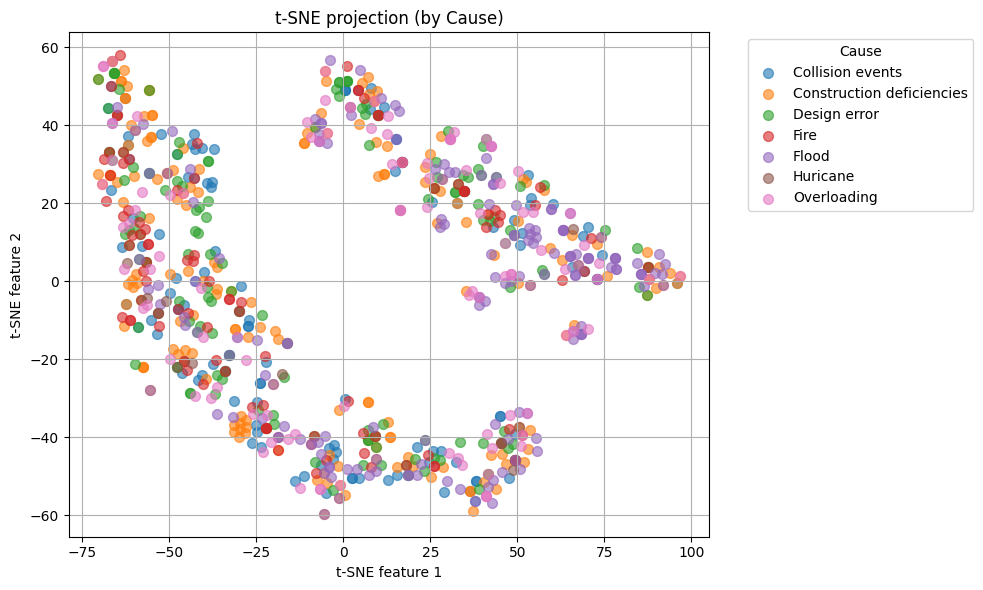

In [82]:
plot_tsne(pipeline,X,y)

In [83]:

# -------------------
# 2. Random Forest (no scaling)
# -------------------
rf = RandomForestClassifier(criterion="gini", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
[[11  4  6 10  5  0  2]
 [ 7 17  9  6 12  0  6]
 [ 5  8 10 10  7  0  5]
 [ 4  3 10  8  2  0  2]
 [ 5  5  4  2 28  0  5]
 [ 1  1  1  0  0  0  0]
 [ 2 12  2  3  6  0  5]]
                           precision    recall  f1-score   support

         Collision events       0.31      0.29      0.30        38
Construction deficiencies       0.34      0.30      0.32        57
             Design error       0.24      0.22      0.23        45
                     Fire       0.21      0.28      0.24        29
                    Flood       0.47      0.57      0.51        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.20      0.17      0.18        30

                 accuracy                           0.31       251
                macro avg       0.25      0.26      0.25       251
             weighted avg       0.31      0.31      0.31       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [84]:

# -------------------
# 3. MLP (with scaling)
# -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\n=== MLP ===")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))



=== MLP ===
[[ 4 12 13  3  6  0  0]
 [12 22 12  0 11  0  0]
 [ 2 17 12  5  9  0  0]
 [ 0  9  6  8  6  0  0]
 [ 4 12  4  1 28  0  0]
 [ 0  2  0  1  0  0  0]
 [ 3 11  4  3  9  0  0]]
                           precision    recall  f1-score   support

         Collision events       0.16      0.11      0.13        38
Construction deficiencies       0.26      0.39      0.31        57
             Design error       0.24      0.27      0.25        45
                     Fire       0.38      0.28      0.32        29
                    Flood       0.41      0.57      0.47        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.00      0.00      0.00        30

                 accuracy                           0.29       251
                macro avg       0.21      0.23      0.21       251
             weighted avg       0.25      0.29      0.26       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [85]:

# -------------------
# 4. Naive Bayes (Gaussian, scaling helps)
# -------------------
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("\n=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



=== Naive Bayes ===
[[ 1  0  3 19 15  0  0]
 [ 6  0  2 28 21  0  0]
 [ 2  4  5 18 16  0  0]
 [ 2  1  1 15 10  0  0]
 [ 4  0  3 10 32  0  0]
 [ 0  0  0  2  1  0  0]
 [ 0  1  2 11 16  0  0]]
                           precision    recall  f1-score   support

         Collision events       0.07      0.03      0.04        38
Construction deficiencies       0.00      0.00      0.00        57
             Design error       0.31      0.11      0.16        45
                     Fire       0.15      0.52      0.23        29
                    Flood       0.29      0.65      0.40        49
                 Huricane       0.00      0.00      0.00         3
              Overloading       0.00      0.00      0.00        30

                 accuracy                           0.21       251
                macro avg       0.12      0.19      0.12       251
             weighted avg       0.14      0.21      0.14       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

# Cambio de Target a Collapse

In [86]:
df_otl

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562


In [87]:
categorical_cols.append('Cause')



In [88]:
categorical_cols.remove('Collapse')

In [89]:
categorical_cols

['Type', 'Material', 'Cause']

In [90]:
num_cols

['temperature_1.9',
 'temperature_1.9.1',
 'temperature_4.5',
 'temperature_7.0',
 'temperature_8.5']

In [91]:
df_otl.columns

Index(['Type', 'Cause', 'Material', 'Collapse', 'temperature_1.9',
       'temperature_1.9.1', 'temperature_4.5', 'temperature_7.0',
       'temperature_8.5'],
      dtype='object')

In [92]:
y = df_otl['Collapse']

cat_cols = ['Type', 'Cause', 'Material']
df_onehot = pd.get_dummies(df_otl.drop('Collapse', axis=1), columns=cat_cols)

X = df_onehot


In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

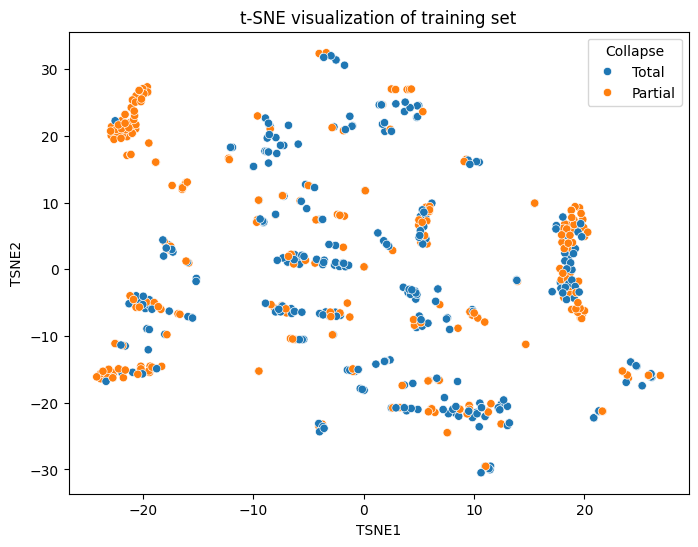

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------
# 1. Scale features
# -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------
# 2. Apply t-SNE
# -------------------
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)  # optional for visualization

# -------------------
# 3. Visualize train t-SNE
# -------------------
tsne_df = pd.DataFrame({
    'TSNE1': X_train_tsne[:, 0],
    'TSNE2': X_train_tsne[:, 1],
    'Collapse': y_train.values
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Collapse', palette='tab10')
plt.title('t-SNE visualization of training set')
plt.show()


In [95]:
df_onehot.columns

Index(['temperature_1.9', 'temperature_1.9.1', 'temperature_4.5',
       'temperature_7.0', 'temperature_8.5', 'Type_Arch', 'Type_Beam',
       'Type_Cable-stayed', 'Type_Slab', 'Type_Suspension', 'Type_Trestle',
       'Type_Truss', 'Cause_Collision events',
       'Cause_Construction deficiencies', 'Cause_Design error', 'Cause_Fire',
       'Cause_Flood', 'Cause_Huricane', 'Cause_Overloading', 'Material_Brick',
       'Material_Composite', 'Material_Composite ', 'Material_Concrete',
       'Material_Iron', 'Material_Prestressed concrete',
       'Material_Reinforced concrete', 'Material_Rock', 'Material_Steel',
       'Material_Wood'],
      dtype='object')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [97]:

# -------------------
# 2. Random Forest (no scaling)
# -------------------
rf = RandomForestClassifier(criterion="gini", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[ 62  54]
 [ 29 106]]
              precision    recall  f1-score   support

     Partial       0.68      0.53      0.60       116
       Total       0.66      0.79      0.72       135

    accuracy                           0.67       251
   macro avg       0.67      0.66      0.66       251
weighted avg       0.67      0.67      0.66       251



In [98]:

# -------------------
# 3. MLP (with scaling)
# -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\n=== MLP ===")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))





=== MLP ===
[[ 62  54]
 [ 32 103]]
              precision    recall  f1-score   support

     Partial       0.66      0.53      0.59       116
       Total       0.66      0.76      0.71       135

    accuracy                           0.66       251
   macro avg       0.66      0.65      0.65       251
weighted avg       0.66      0.66      0.65       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:

# -------------------
# 4. Naive Bayes (Gaussian, scaling helps)
# -------------------
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("\n=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



=== Naive Bayes ===
[[78 38]
 [54 81]]
              precision    recall  f1-score   support

     Partial       0.59      0.67      0.63       116
       Total       0.68      0.60      0.64       135

    accuracy                           0.63       251
   macro avg       0.64      0.64      0.63       251
weighted avg       0.64      0.63      0.63       251



In [100]:
df_cleaned

,Type,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,Beam,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
1,Truss,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
2,Truss,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
3,Suspension,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
4,Beam,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
757,Truss,Steel,Total,2.19699,0.958785,0.91271,0.871430,1.02916
758,Beam,Reinforced concrete,Total,2.58803,1.154960,1.20863,1.043770,1.13041
759,Beam,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
760,Beam,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314


In [101]:
df_otl['Cause'].unique()

array(['Collision events', 'Flood', 'Construction deficiencies',
       'Design error', 'Overloading', 'Fire', 'Huricane'], dtype=object)

In [102]:
mapping = {
    'Collision events': 'Antropogenicas',
    'Overloading': 'Antropogenicas',
    'Fire': 'Naturales',
    'Flood': 'Naturales',
    'Huricane': 'Naturales',
    'Construction deficiencies': 'Técnicas',
    'Design error': 'Técnicas'
}

df_otl['General_Cause'] = df_otl['Cause'].map(mapping).fillna('Otros')


In [103]:
display(df_otl)
print(df_otl['General_Cause'].unique())

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,Antropogenicas
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198,Antropogenicas
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938,Antropogenicas
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,Antropogenicas
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345,Antropogenicas
...,...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453,Técnicas
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962,Naturales
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314,Naturales
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562,Técnicas


['Antropogenicas' 'Naturales' 'Técnicas']


In [104]:
display(df_otl.drop(columns=['General_Cause']))

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562


# Dataset Renombrado

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing',
        ColumnTransformer(transformers=[
            # Only categorical columns
            ('cat', OneHotEncoder(), [
                'Type',
                'Material',
                'Collapse'
            ])
        ])
    ),

])


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing',
        ColumnTransformer(transformers=[
            # Only categorical columns
            ('cat', OrdinalEncoder(), [
                'Type',
                'Material',
                'Collapse'
            ])
        ])
    ),

])


In [107]:
display(df_otl.drop(columns=[
    "temperature_1.9",
    "temperature_1.9.1",
    "temperature_4.5",
    "temperature_7.0",
    "temperature_8.5",
    "General_Cause",
    "Cause"
]))


,Type,Material,Collapse
41,Beam,Reinforced concrete,Total
43,Truss,Steel,Total
45,Truss,Steel,Partial
46,Suspension,Wood,Partial
48,Beam,Reinforced concrete,Total
...,...,...,...
1501,Beam,Reinforced concrete,Total
1503,Beam,Composite,Partial
1505,Beam,Reinforced concrete,Total
1506,Beam,Composite,Total


In [108]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['Type', 'Material',
                                                   'Collapse'])]))])

In [109]:
df_otl

,Type,Cause,Material,Collapse,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause
41,Beam,Collision events,Reinforced concrete,Total,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,Antropogenicas
43,Truss,Collision events,Steel,Total,0.96894,1.784090,1.65721,1.445855,1.41198,Antropogenicas
45,Truss,Collision events,Steel,Partial,0.40503,0.348125,0.21938,0.244370,0.21938,Antropogenicas
46,Suspension,Collision events,Wood,Partial,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,Antropogenicas
48,Beam,Collision events,Reinforced concrete,Total,-0.01883,0.183450,0.26149,0.136105,0.11345,Antropogenicas
...,...,...,...,...,...,...,...,...,...,...
1501,Beam,Construction deficiencies,Reinforced concrete,Total,1.06424,0.899050,1.01453,1.045700,1.01453,Técnicas
1503,Beam,Flood,Composite,Partial,1.67965,1.289420,1.18791,1.369190,1.30962,Naturales
1505,Beam,Flood,Reinforced concrete,Total,1.57352,1.523960,1.32506,1.351885,1.60314,Naturales
1506,Beam,Construction deficiencies,Composite,Total,1.42284,1.466040,1.65549,1.288590,1.42562,Técnicas


In [110]:
cat_cols=['Type', 'Collapse', 'Material']

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder



preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

from sklearn.pipeline import Pipeline


pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),

])

C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


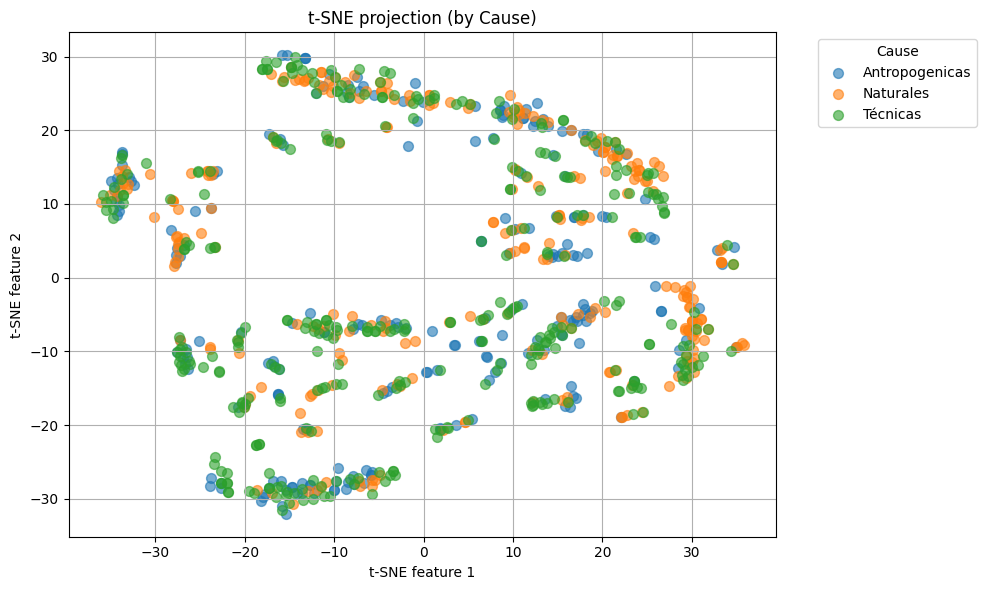

In [112]:
# -------------------
# 1. Split data
# -------------------
X = df_otl.drop(columns=["General_Cause",'Cause'])   # replace with your target column name
y = df_otl["General_Cause"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# %%
plot_tsne(pipeline,X,y)

In [113]:
categorical_cols = ['Type', 'Material', 'Collapse'] 
#
df_encoded = pd.get_dummies(df_otl, columns=categorical_cols, drop_first=False)
X=df_encoded.drop(columns=['Cause','General_Cause'])
y=df_encoded['General_Cause']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [114]:

        
# -------------------
# 2. Random Forest (no scaling)
# -------------------
rf = RandomForestClassifier(criterion="gini", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



=== Random Forest ===
[[24 14 30]
 [15 40 26]
 [23 33 46]]
                precision    recall  f1-score   support

Antropogenicas       0.39      0.35      0.37        68
     Naturales       0.46      0.49      0.48        81
      Técnicas       0.45      0.45      0.45       102

      accuracy                           0.44       251
     macro avg       0.43      0.43      0.43       251
  weighted avg       0.44      0.44      0.44       251



In [115]:


# %%


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\n=== MLP ===")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


# %%



=== MLP ===
[[21 15 32]
 [13 43 25]
 [25 32 45]]
                precision    recall  f1-score   support

Antropogenicas       0.36      0.31      0.33        68
     Naturales       0.48      0.53      0.50        81
      Técnicas       0.44      0.44      0.44       102

      accuracy                           0.43       251
     macro avg       0.42      0.43      0.42       251
  weighted avg       0.43      0.43      0.43       251



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [116]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
df_encoded

,Cause,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause,Type_Arch,Type_Beam,Type_Cable-stayed,...,Material_Composite,Material_Concrete,Material_Iron,Material_Prestressed concrete,Material_Reinforced concrete,Material_Rock,Material_Steel,Material_Wood,Collapse_Partial,Collapse_Total
41,Collision events,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,Antropogenicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
43,Collision events,0.96894,1.784090,1.65721,1.445855,1.41198,Antropogenicas,False,False,False,...,False,False,False,False,False,False,True,False,False,True
45,Collision events,0.40503,0.348125,0.21938,0.244370,0.21938,Antropogenicas,False,False,False,...,False,False,False,False,False,False,True,False,True,False
46,Collision events,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,Antropogenicas,False,False,False,...,False,False,False,False,False,False,False,True,True,False
48,Collision events,-0.01883,0.183450,0.26149,0.136105,0.11345,Antropogenicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Construction deficiencies,1.06424,0.899050,1.01453,1.045700,1.01453,Técnicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1503,Flood,1.67965,1.289420,1.18791,1.369190,1.30962,Naturales,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1505,Flood,1.57352,1.523960,1.32506,1.351885,1.60314,Naturales,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1506,Construction deficiencies,1.42284,1.466040,1.65549,1.288590,1.42562,Técnicas,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [118]:
df_encoded

,Cause,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause,Type_Arch,Type_Beam,Type_Cable-stayed,...,Material_Composite,Material_Concrete,Material_Iron,Material_Prestressed concrete,Material_Reinforced concrete,Material_Rock,Material_Steel,Material_Wood,Collapse_Partial,Collapse_Total
41,Collision events,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,Antropogenicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
43,Collision events,0.96894,1.784090,1.65721,1.445855,1.41198,Antropogenicas,False,False,False,...,False,False,False,False,False,False,True,False,False,True
45,Collision events,0.40503,0.348125,0.21938,0.244370,0.21938,Antropogenicas,False,False,False,...,False,False,False,False,False,False,True,False,True,False
46,Collision events,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,Antropogenicas,False,False,False,...,False,False,False,False,False,False,False,True,True,False
48,Collision events,-0.01883,0.183450,0.26149,0.136105,0.11345,Antropogenicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Construction deficiencies,1.06424,0.899050,1.01453,1.045700,1.01453,Técnicas,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1503,Flood,1.67965,1.289420,1.18791,1.369190,1.30962,Naturales,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1505,Flood,1.57352,1.523960,1.32506,1.351885,1.60314,Naturales,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1506,Construction deficiencies,1.42284,1.466040,1.65549,1.288590,1.42562,Técnicas,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [119]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Categorical columns to one-hot encode
categorical_cols = ['Type', 'Material', 'Collapse'] 

df_encoded = pd.get_dummies(df_otl, columns=categorical_cols, drop_first=False)

# Ordinal encode target
encoder = OrdinalEncoder()
df_encoded['General_Cause'] = encoder.fit_transform(df_otl[['General_Cause']]).astype(int)

# Features and target
X = df_encoded.drop(columns=['Cause','General_Cause'])
y = df_encoded['General_Cause']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("\n=== XGBoost ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [14:54:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
[[25 16 27]
 [17 41 23]
 [22 37 43]]
              precision    recall  f1-score   support

           0       0.39      0.37      0.38        68
           1       0.44      0.51      0.47        81
           2       0.46      0.42      0.44       102

    accuracy                           0.43       251
   macro avg       0.43      0.43      0.43       251
weighted avg       0.43      0.43      0.43       251



In [120]:
# 4. Naive Bayes (Gaussian, scaling helps)
# -------------------
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("\n=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



=== Naive Bayes ===
[[ 2  0 66]
 [ 3  2 76]
 [ 1  3 98]]
              precision    recall  f1-score   support

           0       0.33      0.03      0.05        68
           1       0.40      0.02      0.05        81
           2       0.41      0.96      0.57       102

    accuracy                           0.41       251
   macro avg       0.38      0.34      0.22       251
weighted avg       0.39      0.41      0.26       251



In [121]:
####
df_encoded


,Cause,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause,Type_Arch,Type_Beam,Type_Cable-stayed,...,Material_Composite,Material_Concrete,Material_Iron,Material_Prestressed concrete,Material_Reinforced concrete,Material_Rock,Material_Steel,Material_Wood,Collapse_Partial,Collapse_Total
41,Collision events,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
43,Collision events,0.96894,1.784090,1.65721,1.445855,1.41198,0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
45,Collision events,0.40503,0.348125,0.21938,0.244370,0.21938,0,False,False,False,...,False,False,False,False,False,False,True,False,True,False
46,Collision events,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
48,Collision events,-0.01883,0.183450,0.26149,0.136105,0.11345,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Construction deficiencies,1.06424,0.899050,1.01453,1.045700,1.01453,2,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1503,Flood,1.67965,1.289420,1.18791,1.369190,1.30962,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1505,Flood,1.57352,1.523960,1.32506,1.351885,1.60314,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1506,Construction deficiencies,1.42284,1.466040,1.65549,1.288590,1.42562,2,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [122]:
df_encoded

,Cause,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,General_Cause,Type_Arch,Type_Beam,Type_Cable-stayed,...,Material_Composite,Material_Concrete,Material_Iron,Material_Prestressed concrete,Material_Reinforced concrete,Material_Rock,Material_Steel,Material_Wood,Collapse_Partial,Collapse_Total
41,Collision events,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
43,Collision events,0.96894,1.784090,1.65721,1.445855,1.41198,0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
45,Collision events,0.40503,0.348125,0.21938,0.244370,0.21938,0,False,False,False,...,False,False,False,False,False,False,True,False,True,False
46,Collision events,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
48,Collision events,-0.01883,0.183450,0.26149,0.136105,0.11345,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Construction deficiencies,1.06424,0.899050,1.01453,1.045700,1.01453,2,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1503,Flood,1.67965,1.289420,1.18791,1.369190,1.30962,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1505,Flood,1.57352,1.523960,1.32506,1.351885,1.60314,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1506,Construction deficiencies,1.42284,1.466040,1.65549,1.288590,1.42562,2,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [123]:
df_encoded['General_Cause']=df_otl['General_Cause']
#df_encoded=df_encoded.drop('Cause',axis=1)
numerical_columns=["temperature_1.9","temperature_1.9.1","temperature_4.5","temperature_7.0","temperature_8.5"]
df_cat=df_encoded.drop(numerical_columns,axis=1)
df_cat['General_Cause']=df_otl['General_Cause']
print('CATEGORIES DF')
display(df_cat)
print('Numerical')
df_num=df_encoded[numerical_columns]
display(df_num)


CATEGORIES DF


,Cause,General_Cause,Type_Arch,Type_Beam,Type_Cable-stayed,Type_Slab,Type_Suspension,Type_Trestle,Type_Truss,Material_Brick,...,Material_Composite,Material_Concrete,Material_Iron,Material_Prestressed concrete,Material_Reinforced concrete,Material_Rock,Material_Steel,Material_Wood,Collapse_Partial,Collapse_Total
41,Collision events,Antropogenicas,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
43,Collision events,Antropogenicas,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
45,Collision events,Antropogenicas,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
46,Collision events,Antropogenicas,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
48,Collision events,Antropogenicas,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Construction deficiencies,Técnicas,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1503,Flood,Naturales,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1505,Flood,Naturales,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1506,Construction deficiencies,Técnicas,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Numerical


,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,0.96894,1.784090,1.65721,1.445855,1.41198
45,0.40503,0.348125,0.21938,0.244370,0.21938
46,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...
1501,1.06424,0.899050,1.01453,1.045700,1.01453
1503,1.67965,1.289420,1.18791,1.369190,1.30962
1505,1.57352,1.523960,1.32506,1.351885,1.60314
1506,1.42284,1.466040,1.65549,1.288590,1.42562


C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


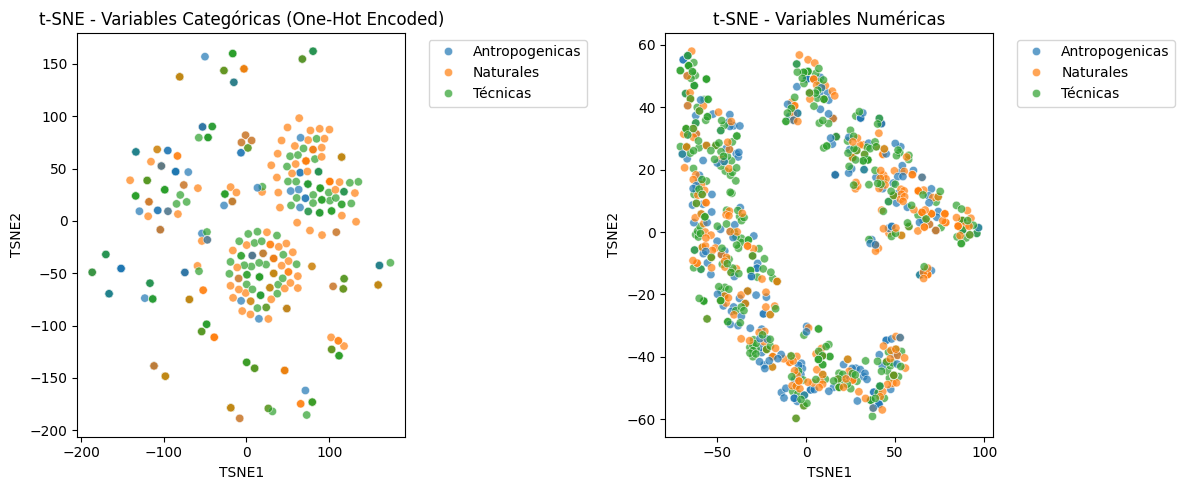

In [124]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copia el df para no alterar el original
df_cat_enc = pd.get_dummies(df_cat.drop(columns=['General_Cause','Cause']), drop_first=False)
y = df_cat['General_Cause']

# Escalado
scaler_cat = StandardScaler()
scaler_num = StandardScaler()

X_cat_scaled = scaler_cat.fit_transform(df_cat_enc)
X_num_scaled = scaler_num.fit_transform(df_num)

# t-SNE
tsne_cat = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_num = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)

X_cat_tsne = tsne_cat.fit_transform(X_cat_scaled)
X_num_tsne = tsne_num.fit_transform(X_num_scaled)

# Crear DataFrames con resultados
tsne_cat_df = pd.DataFrame(X_cat_tsne, columns=['TSNE1', 'TSNE2'])
tsne_cat_df['General_Cause'] = y.values

tsne_num_df = pd.DataFrame(X_num_tsne, columns=['TSNE1', 'TSNE2'])
tsne_num_df['General_Cause'] = y.values

# Visualización
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=tsne_cat_df, x='TSNE1', y='TSNE2', hue='General_Cause', palette='tab10', alpha=0.7)
plt.title('t-SNE - Variables Categóricas (One-Hot Encoded)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1,2,2)
sns.scatterplot(data=tsne_num_df, x='TSNE1', y='TSNE2', hue='General_Cause', palette='tab10', alpha=0.7)
plt.title('t-SNE - Variables Numéricas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [125]:
# Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1) Dividir features/target
# ------------------------------
# df_cat tiene la columna 'General_Cause' como target
X_cat = df_cat.drop(columns=['General_Cause'])
y_cat = df_cat['General_Cause']

# df_num no tiene target (numéricas puras)
X_num = df_num.copy()
y_num = y_cat  # usamos el mismo target para comparar

# ------------------------------
# 2) Split con STRATIFY
# ------------------------------
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42, stratify=y_num)

# ------------------------------
# 3) Escalado (solo para numéricas)
# ------------------------------
scaler = StandardScaler()
Xn_train_scaled = scaler.fit_transform(Xn_train)
Xn_test_scaled = scaler.transform(Xn_test)

# ------------------------------
# 4) Modelos
# ------------------------------
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "RandomForest_gini": RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)  # KNN es SUPERVISADO
}

# ------------------------------
# 5) Entrenar y evaluar
# ------------------------------
def evaluate_models(X_train, X_test, y_train, y_test, dataset_name):
    results = []
    reports = {}
    conf_matrices = {}
    
    print(f"\n====== RESULTADOS PARA {dataset_name.upper()} ======\n")
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
        
        results.append({
            'dataset': dataset_name,
            'model': name,
            'accuracy': acc,
            'precision_w': precision,
            'recall_w': recall,
            'f1_w': f1
        })
        
        print(f"\nModelo: {name}")
        print(f"Accuracy: {acc:.4f} | F1 (weighted): {f1:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
        conf_matrices[name] = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
        
        plt.figure(figsize=(6,5))
        sns.heatmap(conf_matrices[name], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Matriz de confusión ({dataset_name}) - {name}")
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.show()
    
    return pd.DataFrame(results)

# ------------------------------
# 6) Evaluar ambos datasets
# ------------------------------
results_cat = evaluate_models(Xc_train, Xc_test, yc_train, yc_test, "CATEGORICAL")
results_num = evaluate_models(Xn_train_scaled, Xn_test_scaled, yn_train, yn_test, "NUMERICAL")

# ------------------------------
# 7) Comparar resultados
# ------------------------------
final_results = pd.concat([results_cat, results_num]).sort_values(['dataset', 'f1_w'], ascending=[True, False]).reset_index(drop=True)
display(final_results)



====== RESULTADOS PARA CATEGORICAL ======



ValueError: could not convert string to float: 'Collision events'